# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
from ATARI.ModelData.particle import Particle, Neutron
from ATARI.ModelData.spingroups import Spingroup
from ATARI.TAZ.DataClasses.Reaction import Reaction
from ATARI.TAZ.PTBayes import PTBayes
from ATARI.TAZ.RunMaster import RunMaster

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Defining Mean Parameters

In [3]:
eps = 0.005 # convergence factor

# Particle Types:
Target = Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = Neutron

# Mean Parameters
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
false_dens = 1.0/6.0
lvl_dens = [(1-eps)/4.3166, eps/4.3166]
gn2m  = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = Spingroup.zip(l, j)
reaction2 = Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

# 1 Spingroup Case:
SGs = Spingroup.zip(l[:1], j[:1])
reaction1 = Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens[:1], gn2m=gn2m[:1], nDOF=dfn[:1], gg2m=gg2m[:1], gDOF=dfg[:1], spingroups=SGs, EB=EB, false_dens=false_dens)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = PTBayes(Res, reaction1)
distributions = reaction1.distributions('Wigner')
runMaster = RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior, verbose=True)
Posterior_1 = runMaster.WigBayes()

Finding level-spacing probabilities for group 0.
Creating ENCORE pipeline.
Finished ENCORE initialization.
Starting WigBayes
Finished running WigBayes


#### Running 2-Spingroup WigBayes

In [6]:
Prior, TPPrior = PTBayes(Res, reaction2)
distributions = reaction2.distributions('Wigner')
runMaster = RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior, verbose=True)
Posterior_2 = runMaster.WigBayes()

Finding level-spacing probabilities for group 0.
Finding level-spacing probabilities for group 1.
Creating ENCORE pipeline.
Finished ENCORE initialization.
Starting WigBayes
Finished running WigBayes


### Comparison

Average Error for True Probability  = 0.00085
Average Error for False Probability = 0.00218



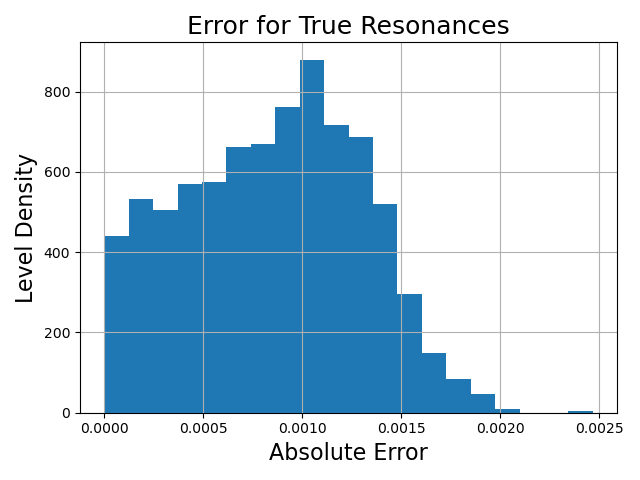

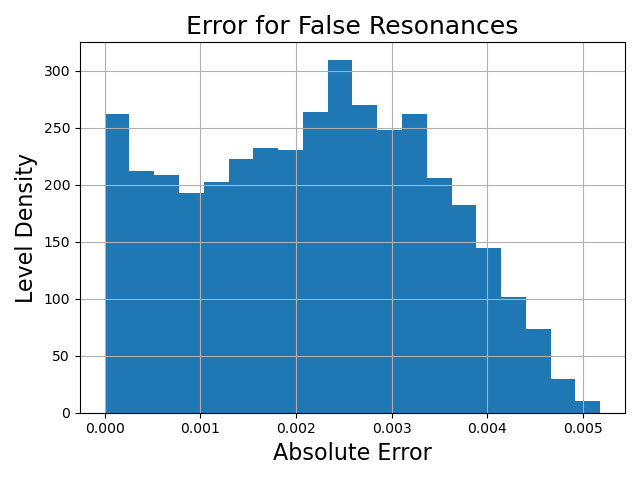

In [7]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [8]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.868438 0.867537]
 [0.980567 0.980451]
 [0.50937  0.508536]
 [0.496204 0.496209]
 [0.714833 0.713855]
 [0.572407 0.571419]
 [0.485569 0.484753]
 [0.544637 0.543462]
 [0.420488 0.41945 ]
 ...
 [0.417301 0.417138]
 [0.440708 0.440441]
 [0.489318 0.488764]
 [0.464855 0.464933]
 [0.456644 0.456125]
 [0.554366 0.552938]
 [0.527909 0.526567]
 [0.446752 0.445878]
 [0.541355 0.540508]]

False Spingroup Posterior:
[[0.131562 0.131466]
 [0.019433 0.01941 ]
 [0.49063  0.487617]
 [0.503796 0.500375]
 [0.285167 0.284206]
 [0.427593 0.425606]
 [0.514431 0.511536]
 [0.455363 0.453107]
 [0.579512 0.575902]
 ...
 [0.582699 0.579416]
 [0.559292 0.55574 ]
 [0.510682 0.507598]
 [0.535145 0.531234]
 [0.543356 0.539554]
 [0.445634 0.443737]
 [0.472091 0.469759]
 [0.553248 0.549885]
 [0.458645 0.456288]]
